## `Decision Tree`

### `Importing Libraries`


In [1]:
import pandas as pd    # to load and read the files
import matplotlib.pyplot as plt    # To represent the point graphically
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier 
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, confusion_matrix, classification_report     # to asses the acuracy and plotting the confusion matrix

### `Loading the dataset and counting the number of samples in each class`

In [2]:
data = "dataset_assignment1.csv"    #assigning a variable to store the csv file
df = pd.read_csv(data)            #Reading the csv file using pandas
class_counts = df['class'].value_counts()     # 'class_counts' counts the number of samples in each class
print("Number of samples for each class:", class_counts)   #print the samples

Number of samples for each class: class
0    459
1    241
Name: count, dtype: int64


### `Visualizing dataset to understand the relation between the features`

`Here I am using correaltion matrix as data visualization as we have more 5 features in the dataset. plotting correlation matrix will give the relation between each features`

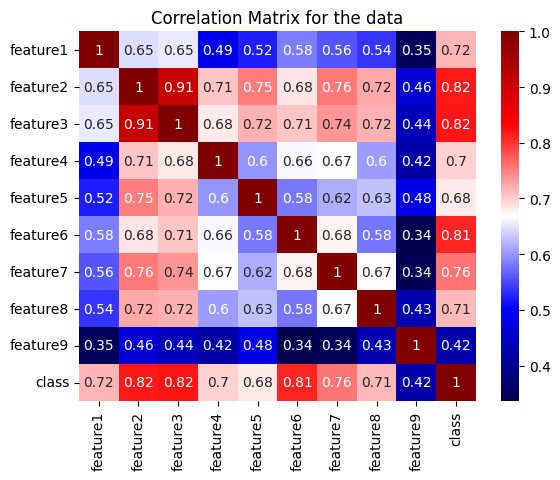

In [3]:
correlation_matrix = df.corr()  # computing the correlation matrix for the featuere in dataset 
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')  # Visualizing using heatmap 
plt.title('Correlation Matrix for the data')  # adding title 
plt.show()  #displaying the heatmap

`Printing the statistical information for each class`

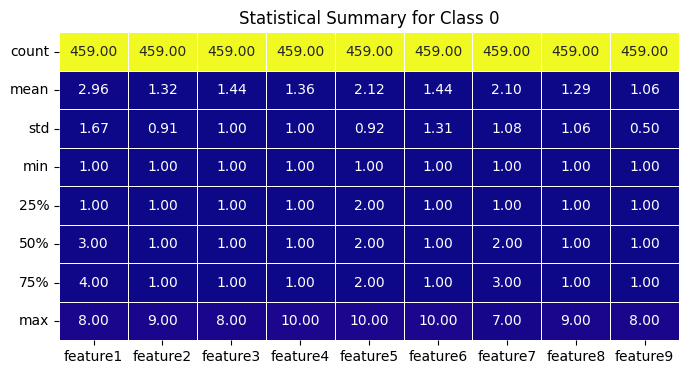

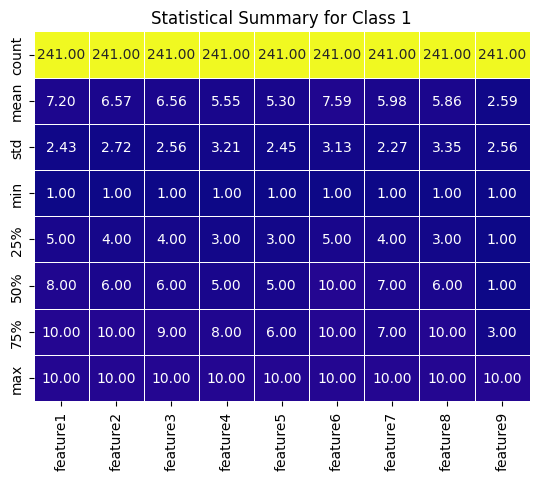

In [4]:
grouped = df.groupby('class')

# Creating a figure and axis
plt.figure(figsize=(8, 4))

# Iterating over each class
for class_label, group in grouped:
    # Compute statistical description excluding the 'class' column
    stats = group.drop(columns=['class']).describe()
    # Plotting the heatmap
    sns.heatmap(stats, annot=True, cmap='plasma', fmt=".2f", linewidths=.5, cbar=False)
    plt.title(f'Statistical Summary for Class {class_label}')
    plt.show()

`Separating the data into input variable and target variable`

In [5]:
x = df.iloc[:, 0:9] # input varible
y = df.iloc[:, 9] # target variable

`Splitting the dataset into training and testing`

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0) # spliting the dataset using testtrain split

`Initiating the first model and tuning by setting the hyperparameters`

In [7]:
decision_tree_classifier = DecisionTreeClassifier()  #initializing DT and setting the range for the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],   #Measure the quality of spit
    'max_depth': [3, 5, 10], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],# Minimum number of samples required to be at a leaf node
    
}

`using gridsearchCV to select the range form the given hyperparameter`

In [8]:
grid_search = GridSearchCV (estimator=decision_tree_classifier, param_grid=param_grid, cv = 5, scoring='accuracy')   #selecting the best out of the specifics and crossvalidation of 5 to reduce overfitting
grid_search.fit(x_train, y_train) #fitting the datasets

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [9]:
best_params = grid_search.best_params_   #applying the selected specific hyperparameter to the DT
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=10)

`best_dt_classifier contains the best parameters selected by gridsearchCV the predictions takes place`

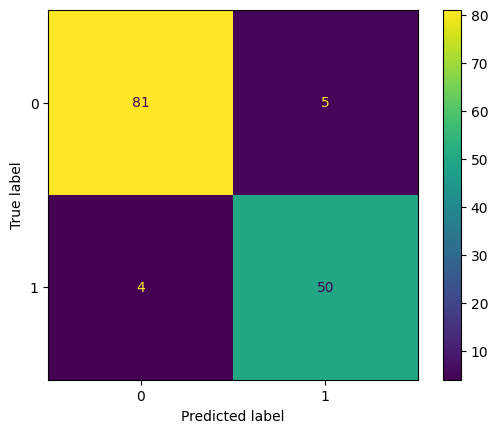

In [10]:
test_predictions = best_dt_classifier.predict(x_test)
cm = confusion_matrix(y_test, test_predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()  


`Printing out the classification report for analysing`

In [11]:
print("Accuracy for this classification ",accuracy_score(y_test, test_predictions))
report = classification_report(y_test, test_predictions)
print(report)

Accuracy for this classification  0.9357142857142857
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.91      0.93      0.92        54

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

